**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
!pip install scikit-fuzzy
import numpy as np
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=64e9cb1aa877d0a85dc69e89f5d209904747981139f07533d904a83932c0e5dd
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Data Acquisition

In [3]:
df=pd.read_csv("/content/drive/MyDrive/LSTM_Fuzzy_Defuzzy_DS.csv")

In [4]:
df.head(20)

,Year,Temperatue,Humidity,Wind Speed,Rainfall
0,2010,24.33,77.06,2.40,5.27
1,2010,27.08,66.12,2.22,0.00
2,2010,31.68,54.19,2.27,0.00
3,2010,33.92,53.94,2.25,26.37
4,2010,31.23,65.31,2.58,89.65
5,2010,28.65,69.38,3.20,84.38
6,2010,27.73,69.56,3.20,68.55
7,2010,27.57,74.00,2.61,163.48
8,2010,26.80,76.62,2.03,84.38
9,2010,26.35,80.19,1.78,126.56


In [5]:
df.columns

Index(['Year', 'Temperatue', 'Humidity', 'Wind Speed', 'Rainfall'], dtype='object')

### Data Preprocessing

### Checking the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        132 non-null    int64  
 1   Temperatue  132 non-null    float64
 2   Humidity    132 non-null    float64
 3   Wind Speed  132 non-null    float64
 4   Rainfall    132 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 5.3 KB


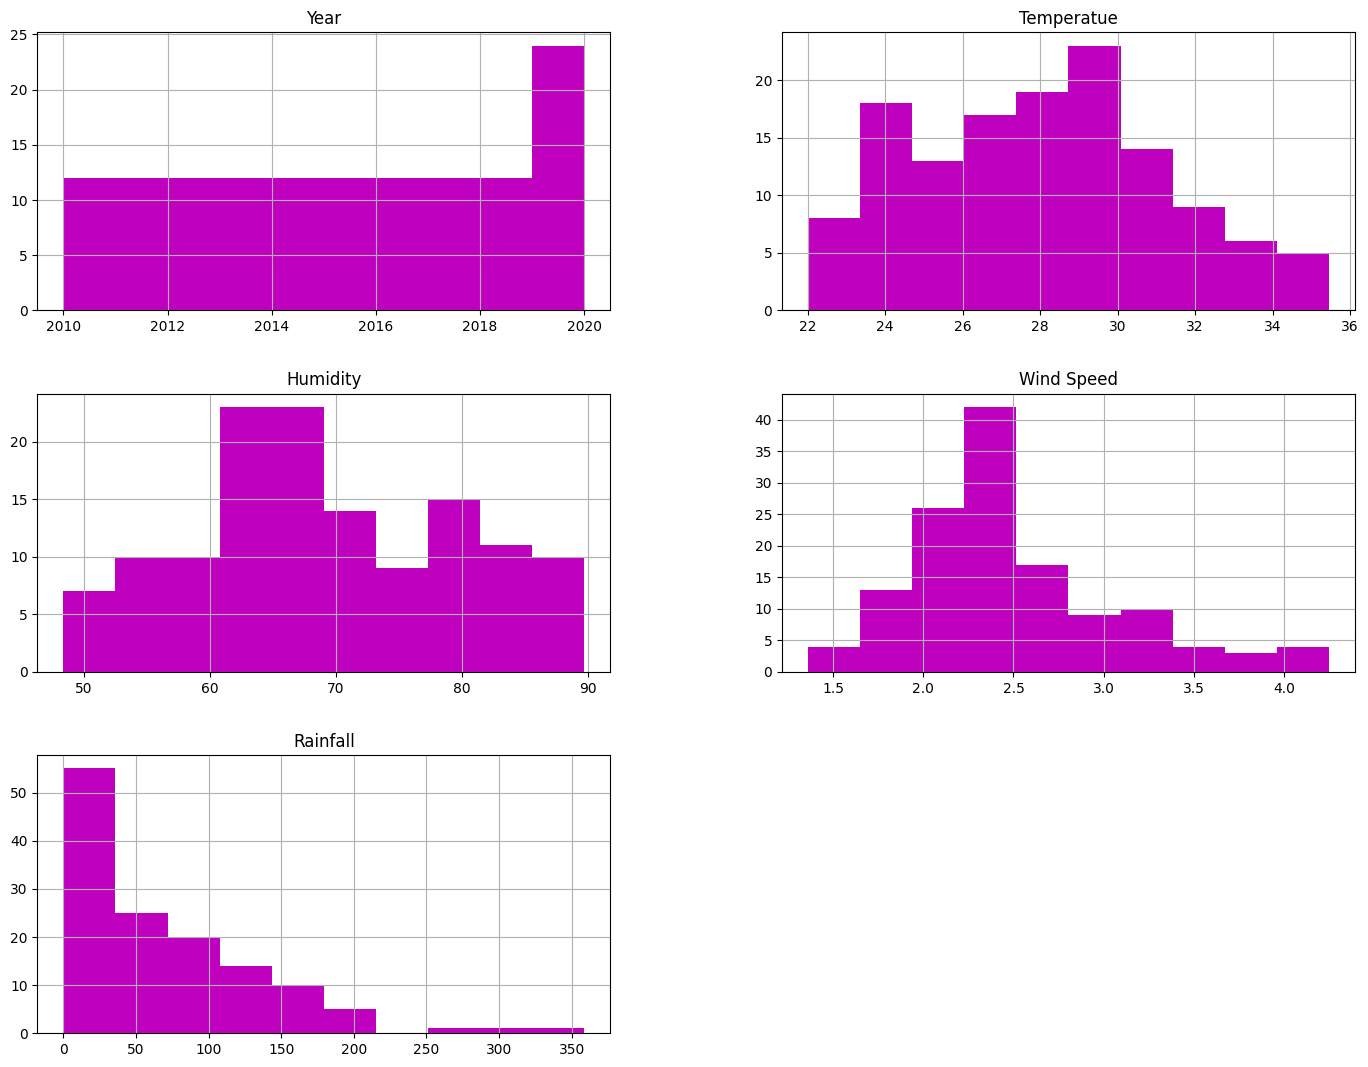

In [7]:
df.hist(figsize=(17,13), color="m");

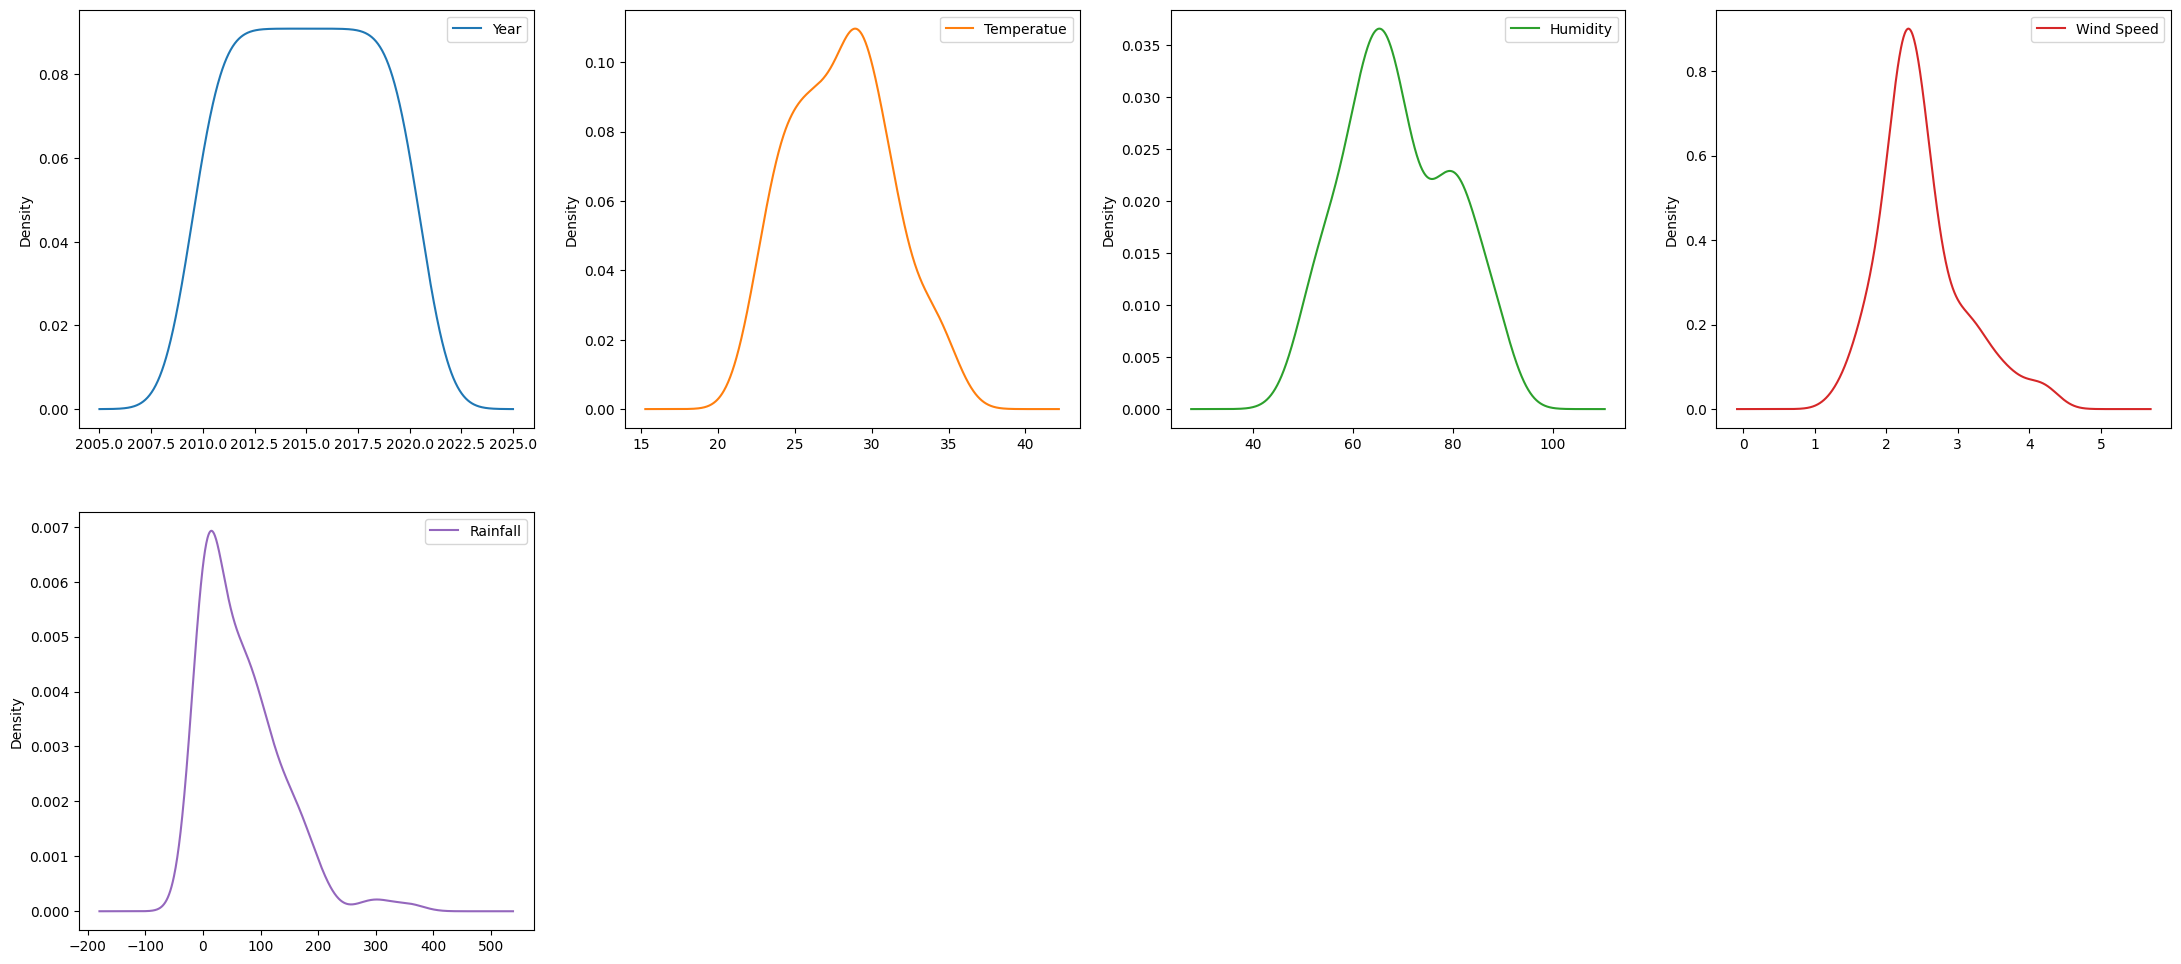

In [8]:
df.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False);

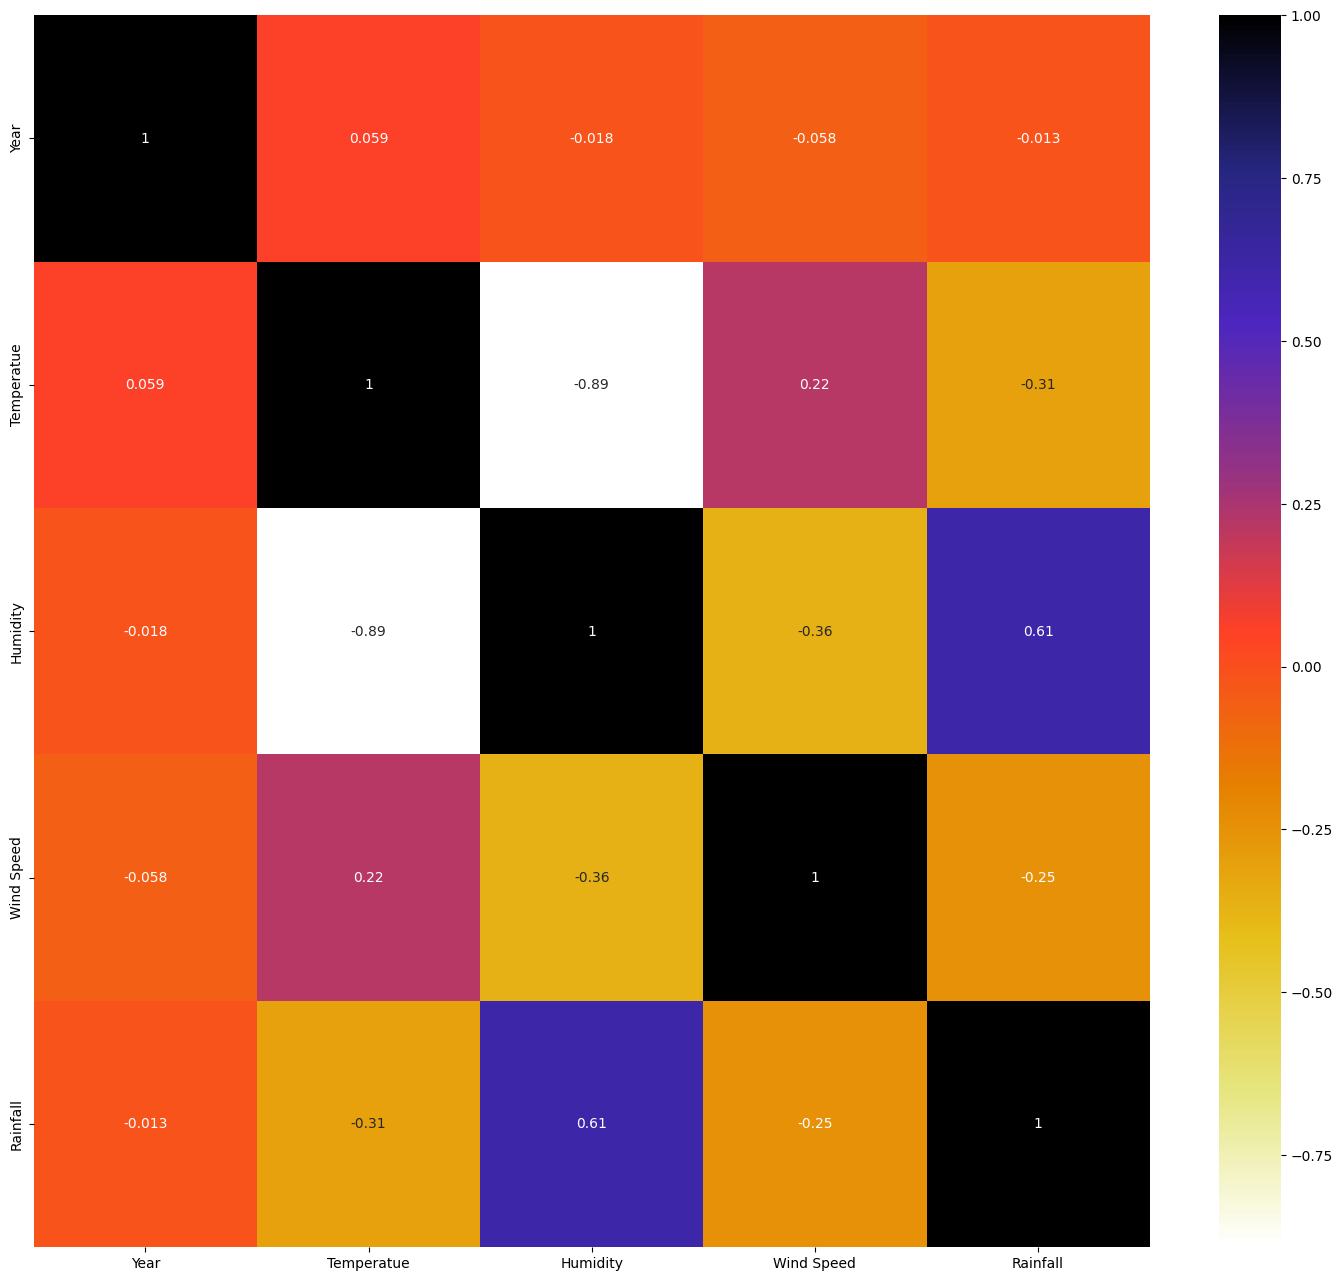

In [9]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r);

### Checking the dimensions

In [10]:
df.shape

(132, 5)

### Checking for missing values

In [11]:
## replace ? with NaN
df = df.replace('0.00', np.NaN)

In [12]:
df.isnull().sum().max()

0

In [13]:
df = df.replace(np.NaN,0)
#df = df.dropna()
df.isnull().sum().max()

0

In [14]:
df['Rainfall'] = df['Rainfall'].astype(int)

In [15]:
df.head(10)

,Year,Temperatue,Humidity,Wind Speed,Rainfall
0,2010,24.33,77.06,2.40,5
1,2010,27.08,66.12,2.22,0
2,2010,31.68,54.19,2.27,0
3,2010,33.92,53.94,2.25,26
4,2010,31.23,65.31,2.58,89
5,2010,28.65,69.38,3.20,84
6,2010,27.73,69.56,3.20,68
7,2010,27.57,74.00,2.61,163
8,2010,26.80,76.62,2.03,84
9,2010,26.35,80.19,1.78,126


In [16]:
new_df = df

**Fuzzification**

Fuzzification is the process of converting a crisp input value to a fuzzy value that is performed by the use of the information in the knowledge base.

In [17]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# convert Rainfall Data to Different categoricous
Weather = ['Wont Rain','Might Rain','Will Be Rain']
new_df['Target'] = '0'
# New Antecedent/Consequent objects hold universe variables and membership
# functions
Temperatue = ctrl.Antecedent(np.arange(0, 40, 1), 'Temperatue' )
Humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'Humidity' )
Rainfall = ctrl.Consequent(np.arange(0, 301, 1), 'Rainfall' )
new_df.loc[(new_df.Rainfall == 0) & (new_df.Rainfall<=20), 'Target'] = '0'
new_df.loc[(new_df.Rainfall >= 21) & (new_df.Rainfall <= 80), 'Target'] = '1'
new_df.loc[(new_df.Rainfall > 81), 'Target'] = '2'
new_df.head(50)

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010,24.33,77.06,2.40,5,0
1,2010,27.08,66.12,2.22,0,0
2,2010,31.68,54.19,2.27,0,0
3,2010,33.92,53.94,2.25,26,1
4,2010,31.23,65.31,2.58,89,2
5,2010,28.65,69.38,3.20,84,2
6,2010,27.73,69.56,3.20,68,1
7,2010,27.57,74.00,2.61,163,2
8,2010,26.80,76.62,2.03,84,2
9,2010,26.35,80.19,1.78,126,2


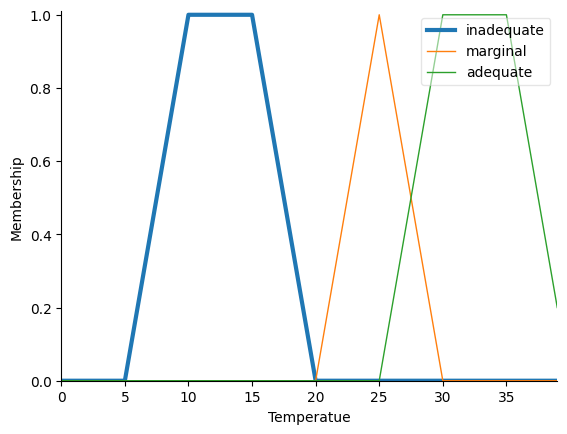

In [18]:
Temperatue[ 'inadequate' ] = fuzz.trapmf(Temperatue.universe, [ 5, 10, 15, 20])
Temperatue[ 'marginal' ] = fuzz.trimf(Temperatue.universe, [ 20, 25, 30])
Temperatue[ 'adequate' ] = fuzz.trapmf(Temperatue.universe, [ 25, 30, 35,40])
# You can see how these look with .view()
Temperatue[ 'inadequate' ].view()

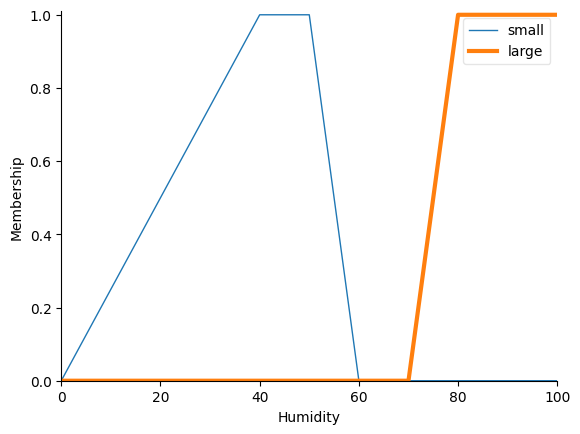

In [19]:
Humidity[ 'small' ] = fuzz.trapmf(Humidity.universe, [ 0, 40, 50, 60])
Humidity[ 'large' ] = fuzz.trapmf(Humidity.universe, [ 70, 80, 100, 100])
# Custom membership functions can be built interactively with a familiar,
Humidity['large'].view()

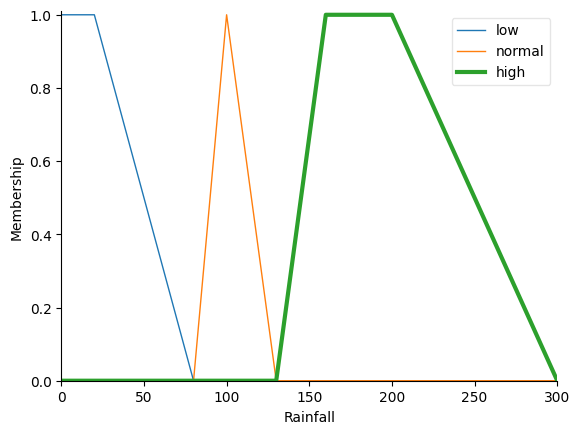

In [20]:
# Pythonic API
Rainfall[ 'low' ] = fuzz.trapmf(Rainfall.universe, [ 0,0,20, 80])
Rainfall[ 'normal' ] = fuzz.trimf(Rainfall.universe, [ 80, 100, 130])
Rainfall[ 'high' ] = fuzz.trapmf(Rainfall.universe, [ 130, 160, 200,300 ])
Rainfall['high'].view()

### Train -Test Split

In [21]:
df= new_df
df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010,24.33,77.06,2.40,5,0
1,2010,27.08,66.12,2.22,0,0
2,2010,31.68,54.19,2.27,0,0
3,2010,33.92,53.94,2.25,26,1
4,2010,31.23,65.31,2.58,89,2
...,...,...,...,...,...,...
127,2020,27.44,75.31,2.62,100,2
128,2020,26.13,80.12,2.35,158,2
129,2020,25.75,81.50,1.82,100,2
130,2020,24.61,85.31,2.30,179,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        132 non-null    int64  
 1   Temperatue  132 non-null    float64
 2   Humidity    132 non-null    float64
 3   Wind Speed  132 non-null    float64
 4   Rainfall    132 non-null    int64  
 5   Target      132 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 6.3+ KB


In [23]:
new_df = new_df.astype('float64')

In [24]:
new_df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010.0,24.33,77.06,2.40,5.0,0.0
1,2010.0,27.08,66.12,2.22,0.0,0.0
2,2010.0,31.68,54.19,2.27,0.0,0.0
3,2010.0,33.92,53.94,2.25,26.0,1.0
4,2010.0,31.23,65.31,2.58,89.0,2.0
...,...,...,...,...,...,...
127,2020.0,27.44,75.31,2.62,100.0,2.0
128,2020.0,26.13,80.12,2.35,158.0,2.0
129,2020.0,25.75,81.50,1.82,100.0,2.0
130,2020.0,24.61,85.31,2.30,179.0,2.0


Model Training - ANN

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from tensorflow.keras.layers import Embedding

In [26]:
new_df

,Year,Temperatue,Humidity,Wind Speed,Rainfall,Target
0,2010.0,24.33,77.06,2.40,5.0,0.0
1,2010.0,27.08,66.12,2.22,0.0,0.0
2,2010.0,31.68,54.19,2.27,0.0,0.0
3,2010.0,33.92,53.94,2.25,26.0,1.0
4,2010.0,31.23,65.31,2.58,89.0,2.0
...,...,...,...,...,...,...
127,2020.0,27.44,75.31,2.62,100.0,2.0
128,2020.0,26.13,80.12,2.35,158.0,2.0
129,2020.0,25.75,81.50,1.82,100.0,2.0
130,2020.0,24.61,85.31,2.30,179.0,2.0


In [27]:
new_df = new_df.astype('float64')

In [28]:
label = new_df['Target']
new_df=new_df.drop(["Target"],axis=1)

In [29]:
X=new_df
X.shape

(132, 5)

In [30]:
y=label
y.shape

(132,)

In [31]:
y=y.to_numpy()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
#y

In [33]:
print(X.shape)
print(y.shape)

(132, 5)
(132, 3)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [56]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(27, 5)
(27, 3)
(105, 5)
(105, 3)


In [36]:
X_train = np.reshape(X_train, (X_train.shape[0],1,X.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X.shape[1]))

**Model Training**

In [37]:
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import collections
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
def model1(shape):
    model = Sequential()
    model.add(Flatten(input_shape=shape))
    model.add(Dense(64))
    model.add(Dense(128))
    model.add(Dense(256))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(3, activation='softmax'))
    return model

In [38]:
model=model1(X_train.shape[1:])

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 1

In [40]:
history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_test, y_test))
history
model.save('ANNSVM.h5')

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 0.6123 - accuracy: 0.6286 - val_loss: 0.4651 - val_accuracy: 0.7037
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3802 - accuracy: 0.8190 - val_loss: 0.4024 - val_accuracy: 0.7407
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2838 - accuracy: 0.8000 - val_loss: 0.3536 - val_accuracy: 0.7407
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2387 - accuracy: 0.8095 - val_loss: 0.3964 - val_accuracy: 0.7778
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2098 - accuracy: 0.8190 - val_loss: 0.3592 - val_accuracy: 0.7407
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1926 - accuracy: 0.8381 - val_loss: 0.2946 - val_accuracy: 0.7407
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1596 - accuracy: 0.8952 - val_loss: 0.2962 - val_accuracy: 0.7407
Epoch 8/100
4/4 [===

In [41]:
for i in range(10):
  for j in range(1):
    for k in range(5):
      t=X_test[i,j,k]

In [42]:
t=[]
t.append(t)

In [43]:
X_test.shape

(27, 1, 5)

In [57]:
print(y_test)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [58]:
y_test1=np.argmax(y_test,ar)

In [65]:
y_pred=np.argmax(ans, axis=1)

In [67]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [66]:
y_pred

array([2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2,
       0, 2, 1, 2, 1])

In [46]:
ans = model.predict(X_test)

1/1 [==============================] - 0s 184ms/step


In [69]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=np.argmax(ans, axis=1)
y_test=np.argmax(y_test,axis=1)
cm = confusion_matrix(y_test, y_pred)

In [70]:
from sklearn.metrics import accuracy_score
DLNN_acc= accuracy_score(y_pred, y_test)
print("ANN Accuracy: ", DLNN_acc)

ANN Accuracy:  0.8518518518518519


In [71]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [72]:
cm

array([[7, 2, 0],
       [0, 9, 2],
       [0, 0, 7]])

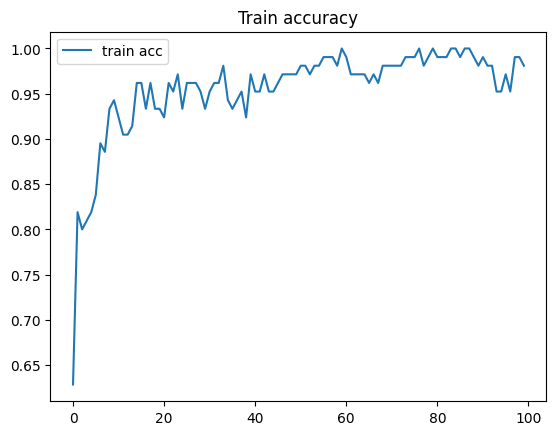

In [73]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.title("Train accuracy")
plt.show()

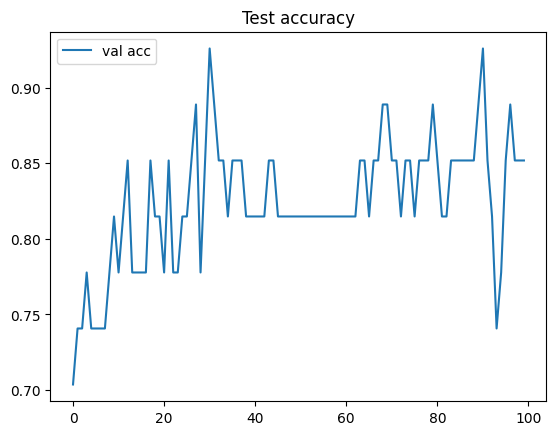

In [74]:
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Test accuracy")
plt.show()

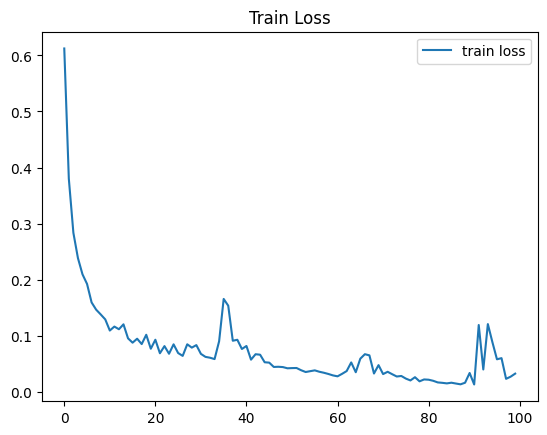

In [75]:
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.title('Train Loss')
plt.show()

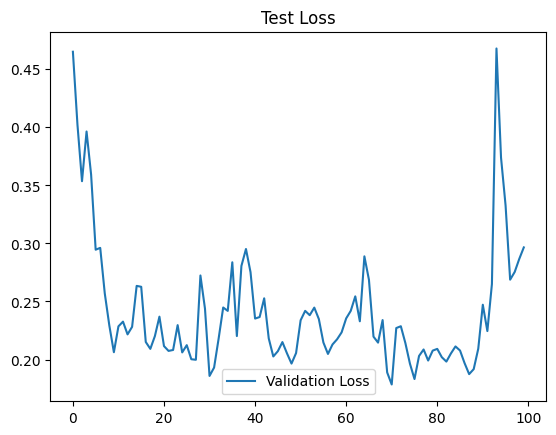

In [76]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Test Loss')
plt.show()

In [77]:
from sklearn.metrics import precision_score

In [78]:
# calculate precision
precision = precision_score(y_test, y_pred, average='micro')
print('Precision of ANN: %.3f' % precision)

Precision of ANN: 0.852


In [79]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)

In [80]:
#sensitivity
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity of ANN: ', sensitivity1 )

Sensitivity of ANN:  0.7777777777777778


In [81]:
#specificity
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity of ANN: ', specificity1)

Specificity of ANN:  1.0


<Axes: >

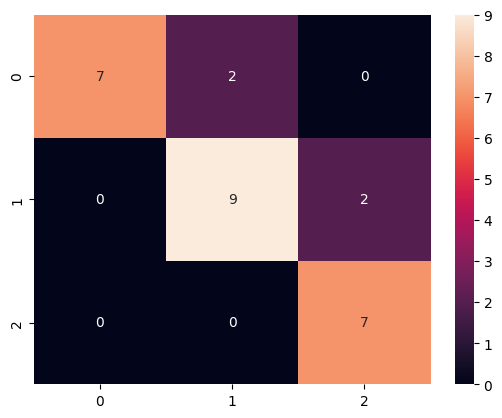

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True)

<Axes: >

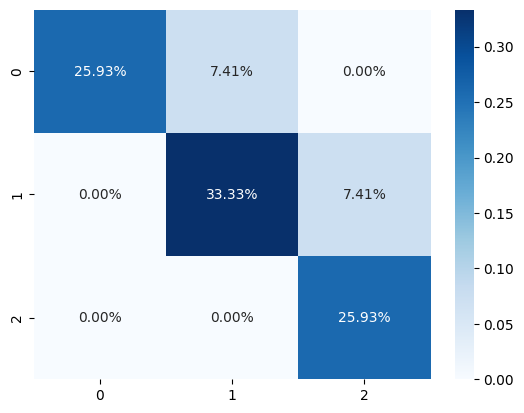

In [83]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [84]:
TP=cm[0][0]
FN=cm[0][1]
FP=cm[1][0]
TN=cm[1][1]

In [85]:
from sklearn.metrics import precision_recall_fscore_support


In [86]:
sens_best=TP/(TP+FN)
sum=0
print("sens_best",sens_best)
for i in range(1,101,1):
    sum=sum+pow(sens_best,i)
print("sum",sum)
av_sens=sum/100
print("Average Recall av_sens",av_sens)

sens_best 0.7777777777777778
sum 3.4999999999573803
Average Recall av_sens 0.0349999999995738


In [87]:
prec_best=TP/(FP+TP)
sum=0
print("prec_best",prec_best)
for i in range(1,101,1):
    sum=sum+pow(prec_best,i)
print("sum",sum)
av_prec=sum/100
print("Average Precision av_prec",av_prec)

prec_best 1.0
sum 100.0
Average Precision av_prec 1.0


### Classification Report

In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.82      0.82      0.82        11
           2       0.78      1.00      0.88         7

    accuracy                           0.85        27
   macro avg       0.87      0.87      0.86        27
weighted avg       0.87      0.85      0.85        27



**Defuzzification**

In [89]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [97]:
# make a prediction using Proposed Model
row = [[2012,28.69,66.19,2.84,89.0]]

row=[[2010.0,31.23	,65.31	,2.58,	89.0]]
r = [[2010 , 24.33 , 77.06 ,60.78 , 60.21]]
yhat = model.predict(row)
yhat = np.argmax(yhat, axis = 1)
#Weather = Weather[yhat[0]]

1/1 [==============================] - 0s 53ms/step


In [98]:
yhat[0]

2

In [99]:
rule1 = ctrl.Rule(Temperatue[ 'adequate' ] | Humidity[ 'small' ], Rainfall[ 'low' ])
rule2 = ctrl.Rule(Humidity[ 'small' ] & Temperatue[ 'marginal' ], Rainfall[ 'normal' ])
rule3 = ctrl.Rule(Temperatue[ 'inadequate' ] | Humidity[ 'large' ], Rainfall[ 'high' ])

In [100]:
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
final_risk = ctrl.ControlSystemSimulation(risk_ctrl)

In [103]:
final_risk.input[ 'Temperatue' ] = 24.61
final_risk.input[ 'Humidity' ] = 85.31

201.11111111111137


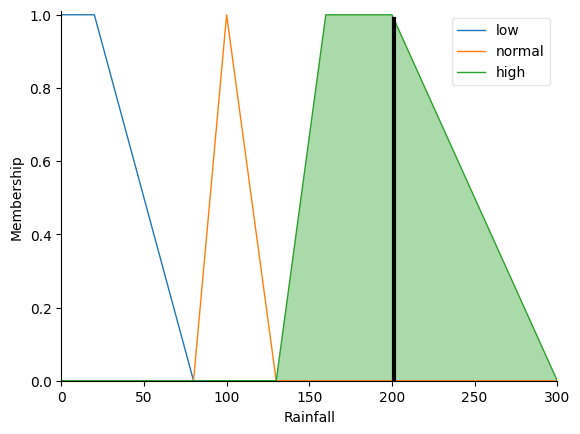

In [104]:
final_risk.compute()

print (final_risk.output[ 'Rainfall' ])
Rainfall.view(sim=final_risk)